In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data= pd.read_csv("housing.csv")

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#We need to build a model to predict the price of a house based on the given features

In [5]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
############ 1.Null treatment#############
#no nulls detected in the data

In [9]:
############ 2. Categorical variables#########
#6 columns have yes/no data so they can be replaced with 1/0 

In [4]:
varlist= ['mainroad', 'guestroom','basement','hotwaterheating','prefarea','airconditioning']

In [5]:
#creating function to map
def binary_map(x):
    return x.map({"yes":1,"no":0})    

#applying the function
data[varlist]= data[varlist].apply(binary_map)

#reading the dataset
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [6]:
#We still have categorical variables in furnishingstatus

#using dummy encoding to 
status= pd.get_dummies(data['furnishingstatus'])

status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [7]:
#We dont need three columns but only two to avoid multicollinearity
#hence dropping the first column

status= pd.get_dummies(data['furnishingstatus'],drop_first=True)

#now adding the status column back to the data
data= pd.concat([data,status],axis=1)

#dropping teh furnishingstatus column from the main data
data= data.drop(['furnishingstatus'],axis=1)

In [9]:
features=data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [15]:
#Now that our data is ready, lets go ahead and split the data into training and test datasets for the model
#importing train_test_split from the scikit learn package

from sklearn.model_selection import train_test_split

#using the seed to get the same rows every time
np.random.seed(0)

df_train, df_test = train_test_split(data, test_size= 0.3, random_state=100)

In [16]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2310000,3180,2,1,1,1,0,0,0,0,0,0,0,1
53,7350000,5150,3,2,4,1,0,0,0,1,2,0,1,0
350,3780000,3420,2,1,2,1,0,0,1,0,1,0,1,0
79,6650000,6000,3,2,3,1,1,0,0,1,0,0,0,0


In [17]:
#As we observe that there are some columns with values that are uncomparable to the other values in the dataframe
# like the price and the area that have very high values
# in order to get them into comparable values, we will normalize them using
# MinMaxScaler function

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

#list of columns with variable values except the yes/no and dummies
var_list=['price','area','bedrooms','bathrooms','stories','parking']

df_train[var_list]= scaler.fit_transform(df_train[var_list])

df_train

<ipython-input-17-126e74b077a6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[var_list]= scaler.fit_transform(df_train[var_list])
/Users/bnkr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [18]:
#Now we have a clean train dataset to be ready for the model
# lets divide the dataset into X and y sets to build the model

y_train = df_train.pop('price')
X_train = df_train

In [19]:
#lets build a linear model using the statsmodel package and the OLS method of the statsmodels.api module


import statsmodels.api as sm

X_train_lm= sm.add_constant(X_train)

model= sm.OLS(y_train,X_train_lm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           8.83e-83
Time:                        17:52:12   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#the model gives a 67% accuracy 
#However, there are some columns in the data with very high p-value which means they are insignificant
#We need to get rid of them
#before that, we need to check for multicollinearity if there is a dependency
#for that we need to calculate VIFs

#to calculate VIF, we use statmodels: Variance_inflation_factors function

from statsmodels.stats.outliers_influence import variance_inflation_factor

#creating a dataframe to accurately view
vif= pd.DataFrame()

#features are columns of X_train
vif['Features']= X_train.columns

#VIF values are calculated
vif['VIF']= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif['VIF']= round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [21]:
#Usually columns with VIF value greater than 5 are to be removed
#But the sequence of removal is always P-value first
#As we can see semi-furnished with high p-value, lets try to remove it first
#also we need to evaluate the model as we remove one variable and check again.

X = X_train.drop('semi-furnished',axis=1)

X_train_lm=sm.add_constant(X)


In [22]:
model2= sm.OLS(y_train, X_train_lm).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.07e-83
Time:                        17:52:12   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Now we calculate the VIFs again

vif= pd.DataFrame()

#features are columns of the latest training set X
vif['Features']= X.columns

#VIF values are calculated
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF']= round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [24]:
X=X.drop('bedrooms',axis=1)

X_lm=sm.add_constant(X)

model2=sm.OLS(y_train,X_lm).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           2.73e-84
Time:                        17:52:12   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
vif= pd.DataFrame()

#features are columns of the latest training set X
vif['Features']= X.columns

#VIF values are calculated
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF']= round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [26]:
X=X.drop('basement',axis=1)

X_lm=sm.add_constant(X)

model3=sm.OLS(y_train,X_lm).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           3.13e-84
Time:                        17:52:12   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014      2.958      0.003       0.014       0.071
area                0.2335      0.030      7.772      0.000       0.174       0.293
bathrooms           0.2019      0.021      9.397      0.000       0.160       0.244
stories             0.1081      0.017      6.277      0.000       0.074       0.142
mainroad            0.0497      0.014      3.468      0.001       0.022       0.078
guestroom           0.0402      0.013      3.124      0.002       0.015       0.065
hotwaterheating     0.0876      0.022      4.051      0.000       0.045       0.130
airconditioning     0.0682      0.011      6.028      0.000       0.046       0.090
parking             0.0629      0.018      3.482      0.001       0.027       0.098
prefarea            0.0637      0.012      5.452      0.000       0.041       0.087
unfurnished        -0.0337      0.010     -3.295      0.001      -0.054      -0.014
==============================================================================
Omnibus:                       97.054   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.034
Skew:                           1.124   Prob(JB):                     1.18e-70
Kurtosis:                       6.902   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif= pd.DataFrame()

#features are columns of the latest training set X
vif['Features']= X.columns

#VIF values are calculated
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif['VIF']= round(vif['VIF'],2)
vif.sort_values('VIF',ascending=False)

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


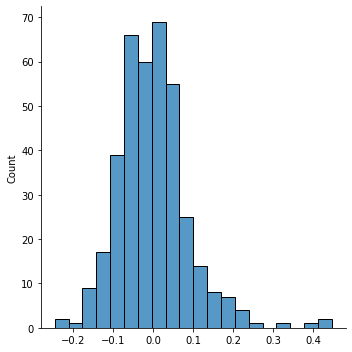

In [28]:
#Now that we have acceptable ranges for P-values and the VIFs
#lets check for one last thing: the residual errors
#if the residual errors are not normally distributed, then we need to normalize them too

#residual error= y_original_value - y_predicted_value

import seaborn as sns
y_predict_value = model3.predict(X_lm)

sns.displot(y_train-y_predict_value,bins=20)



In [29]:
#the residual errors seem to be normally distributed. So we can move forward with the final prediction

#similar to how we scaled the train data using the MinMaxScaler to bring the columns with values different than the most 
#like price, we need to apply the same to the test data for the model to accurately run

var_list=['price','area','bedrooms','bathrooms','stories','parking']

df_test[var_list]= scaler.transform(df_test[var_list])

df_test


<ipython-input-29-260aa460bed8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[var_list]= scaler.transform(df_test[var_list])
/Users/bnkr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.145455,0.010032,0.4,0.5,0.333333,1,0,1,0,0,0.000000,1,0,1
191,0.284848,0.780007,0.4,0.0,0.333333,1,1,1,0,0,0.000000,0,1,0
310,0.206061,0.365100,0.4,0.0,0.000000,1,0,1,0,0,0.000000,0,1,0
46,0.500000,0.366420,0.4,0.5,1.000000,1,0,0,0,1,0.333333,0,0,0


In [30]:
#dividing the data into y_test and x_test

y_test = df_test.pop('price')
X_test = df_test

#Add constant to the test dataframe
X_test_lm = sm.add_constant(X_test)

#dropping the columns that we did not need
X_test_lm = X_test_lm.drop(['semi-furnished','bedrooms','basement'],axis=1)

#make the prediction
y_predict_test = model3.predict(X_test_lm)

In [ ]:
#now we need to check if the R^2 value is comparable to the train data
#import r2_score library from sklearn

from sklearn.metrics import r2_score
r2_score(y_true= y_test, y_pred=y_predict_test)

In [16]:
####################### Random Forest implementation ##############################

In [8]:
features.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0,0


In [9]:
#splitting features into training, labels datasets

In [10]:
from sklearn.model_selection import train_test_split

#labels are the response variables
labels=np.array(features['price'])

#saving the columns for future use
features_list= list(features.columns)

#dropping the label from the main dataset
features=features.drop('price',axis=1)

#converting the dataset to numpy array
features=np.array(features)

In [11]:
train_features, test_features, train_label, test_label= train_test_split(features, labels, test_size=0.25, random_state=50)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_label.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_label.shape)

Training Features Shape: (408, 13)
Training Labels Shape: (408,)
Testing Features Shape: (137, 13)
Testing Labels Shape: (137,)


In [15]:
features


array([[7420, 4, 2, ..., 'yes', 0, 0],
       [8960, 4, 4, ..., 'no', 0, 0],
       [9960, 3, 2, ..., 'yes', 1, 0],
       ...,
       [3620, 2, 1, ..., 'no', 0, 1],
       [2910, 3, 1, ..., 'no', 0, 0],
       [3850, 3, 1, ..., 'no', 0, 1]], dtype=object)